In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is the smoker status dataset. Each row contains a person's health information and whether they smoke or not. We want to use these health factors to predict a person's smoker status.

In [4]:
data_path = '/content/drive/MyDrive/Data Science/Project 3/Project 3/data/'
df = pd.read_csv(data_path + 'cleaned_data.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,AST,ALT,ggt,dental caries,tartar,smoking,bmi,upcratio,LDLratio,HDLratio
0,0,0,40,155,60,81.3,1.2,1.0,1,1,...,18,19,27,0,1,0,0.002497,1.428571,0.586047,0.339535
1,1,0,40,160,60,81.0,0.8,0.6,1,1,...,22,19,18,0,1,0,0.002344,1.666667,0.661458,0.218750
2,2,1,55,170,60,80.0,0.8,0.8,1,1,...,21,16,22,0,0,1,0.002076,1.000000,0.623967,0.227273
3,3,1,40,165,70,88.0,1.5,1.5,1,1,...,19,26,18,0,1,0,0.002571,1.000000,0.701863,0.139752
4,4,0,40,155,60,86.0,1.0,1.0,1,1,...,16,14,22,0,0,0,0.002497,1.666667,0.581522,0.336957


#Correlations

In [ ]:
corr = df.corr()
corr['smoking']

ID                     0.011476
gender                 0.510340
age                   -0.162557
height(cm)             0.396675
weight(kg)             0.302780
waist(cm)              0.226259
eyesight(left)         0.061204
eyesight(right)        0.063017
hearing(left)         -0.023209
hearing(right)        -0.018855
systolic               0.073109
relaxation             0.108309
fasting blood sugar    0.100279
cholesterol           -0.028548
triglyceride           0.251799
HDL                   -0.178470
LDL                   -0.045220
hemoglobin             0.400678
urine protein          0.014267
serum creatinine       0.216812
AST                    0.059253
ALT                    0.097338
ggt                    0.236619
dental caries          0.103857
tartar                 0.098655
smoking                1.000000
bmi                    0.106967
upcratio              -0.118266
LDLratio              -0.046741
HDLratio              -0.132548
Name: smoking, dtype: float64

In [ ]:
r2 = df.corr() ** 2
r2['smoking']

ID                     0.000132
gender                 0.260447
age                    0.026425
height(cm)             0.157351
weight(kg)             0.091676
waist(cm)              0.051193
eyesight(left)         0.003746
eyesight(right)        0.003971
hearing(left)          0.000539
hearing(right)         0.000356
systolic               0.005345
relaxation             0.011731
fasting blood sugar    0.010056
cholesterol            0.000815
triglyceride           0.063403
HDL                    0.031852
LDL                    0.002045
hemoglobin             0.160543
urine protein          0.000204
serum creatinine       0.047008
AST                    0.003511
ALT                    0.009475
ggt                    0.055989
dental caries          0.010786
tartar                 0.009733
smoking                1.000000
bmi                    0.011442
upcratio               0.013987
LDLratio               0.002185
HDLratio               0.017569
Name: smoking, dtype: float64

Variables most correlated with smoking are:
- gender
- height
- hemoglobin

#Imports for decision trees

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

#Decision Trees - Train test split but no balancing

70% of data training, 30% testing

Starting with just one set of parameters

In [ ]:
X = df.drop('smoking', axis=1)
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_clf.fit(X_train, y_train)
preds = dt_clf.predict(X_test)
train_df = pd.merge(X_train, y_train, left_index=True, right_index=True)
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)
test_df['smoking preds'] = preds

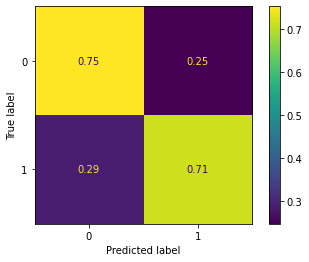

0.7380296863777831


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, preds, normalize='true')
plt.show()
print(accuracy_score(y_test, preds))

In [ ]:
plt.figure(figsize=(10,10), dpi=300)
plot_tree(dt_clf, feature_names = X_test.columns);

70% of data training, 30% testing

Using for loop to evaluate parameters

In [ ]:
max_depth = [2, 5, 10, 25, 50]
#how many people before asking a q
min_samples_split = [2, 5, 25, 50, 100]
min_samples_leaf = [2, 5, 25, 50, 100]
#5x5x5 combos - 125 diff models
acc_list = []
params_list = []
for md in max_depth:
  for mss in min_samples_split:
    for msl in min_samples_leaf:
      dt_clf = DecisionTreeClassifier(max_depth=md, min_samples_split=mss, min_samples_leaf=msl)
      dt_clf.fit(X_train, y_train)
      dt_preds = dt_clf.predict(X_test)
      #we don't want to look at 125 confusion matrices
      #let's look at accuracy
      acc = accuracy_score(y_test, dt_preds)
      acc_list.append(acc)
      params_list.append({'md:': md, 'mss': mss, 'msl': msl})

In [ ]:
max(acc_list)

0.7573018913095523

In [ ]:
np.where(acc_list == max(acc_list))

(array([75]),)

In [ ]:
params_list[75]

{'md:': 25, 'mss': 2, 'msl': 2}

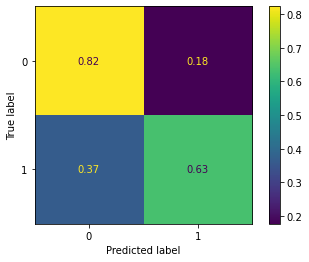

0.7541896097677759


In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=25, min_samples_split=2, min_samples_leaf=2)
dt_clf.fit(X_train, y_train)
preds = dt_clf.predict(X_test)
train_df = pd.merge(X_train, y_train, left_index=True, right_index=True)
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)
test_df['smoking preds'] = preds
ConfusionMatrixDisplay.from_predictions(y_test, preds, normalize='true')
plt.show()
print(accuracy_score(y_test, preds))

70% of data training, 30% testing

Using grid search function

In [ ]:
dtc = DecisionTreeClassifier()
dtc_parms = {'max_depth': [2, 5, 10, 25, 50, 100],
             'min_samples_split': [2, 5, 10, 25, 50, 100],
             'min_samples_leaf': [2, 5, 10, 25, 50, 100]}
dtc_grid_search = GridSearchCV(dtc, dtc_parms)
dtc_grid_search.fit(X_train, y_train)
dtc_grid_search.best_params_

In [ ]:
#100 is a lot of questions to ask
dtc = DecisionTreeClassifier()
dtc_parms = {'max_depth': [2, 5, 10, 25, 50],
             'min_samples_split': [2, 5, 10, 25, 50],
             'min_samples_leaf': [2, 5, 10, 25, 50]}
dtc_grid_search = GridSearchCV(dtc, dtc_parms)
dtc_grid_search.fit(X_train, y_train)
dtc_grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [ ]:
dtc_grid_search.best_score_

0.7427406727127226

#Decision Trees - Train test split, balanced data, incorrect parameters (didn't drop ID)

In [ ]:
#make separate dfs with only smokers and only nonsmokers
df_smokers = df[df['smoking'] == 1]
df_nonsmokers = df[df['smoking'] == 0]
X_smokers = df_smokers.drop('smoking', axis=1)
y_smokers = df_smokers['smoking']
X_nonsmokers = df_nonsmokers.drop('smoking', axis=1)
y_nonsmokers = df_nonsmokers['smoking']

In [ ]:
#split these dfs 70/30, then combine to get 50-50 balanced training and testing sets
X_train_smokers, X_test_smokers, y_train_smokers, y_test_smokers = train_test_split(X_smokers, y_smokers, train_size = 0.7)
num_rows_to_use = len(X_train_smokers)

X_train_nonsmokers, X_test_nonsmokers, y_train_nonsmokers, y_test_nonsmokers = train_test_split(X_nonsmokers, 
                                                                                    y_nonsmokers, train_size = num_rows_to_use)
X_train = pd.concat([X_train_smokers, X_train_nonsmokers])
y_train = pd.concat([y_train_smokers, y_train_nonsmokers])
X_test = pd.concat([X_test_smokers, X_test_nonsmokers])
y_test = pd.concat([y_test_smokers, y_test_nonsmokers])

In [ ]:
dtc = DecisionTreeClassifier()
dtc_parms = {'max_depth': [2, 5, 10, 25, 50],
             'min_samples_split': [2, 5, 10, 25, 50],
             'min_samples_leaf': [2, 5, 10, 25, 50]}
dtc_grid_search = GridSearchCV(dtc, dtc_parms)
dtc_grid_search.fit(X_train, y_train)
dtc_grid_search.best_params_
dtc_grid_search.best_score_

0.7558670131095184

In [ ]:
dtc_grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 2}

In [ ]:
#going to split data multiple times
#results for best params:
# {'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 2}
# {'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 2}
#took about 2 min to run
#{'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 2}
#{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 2}

In [ ]:
#honing in on min samples leaf
dtc = DecisionTreeClassifier()
dtc_parms = {'max_depth': [4, 5, 6],
             'min_samples_split': [2, 3],
             'min_samples_leaf': [35, 40, 45]}
dtc_grid_search = GridSearchCV(dtc, dtc_parms)
dtc_grid_search.fit(X_train, y_train)
print(dtc_grid_search.best_params_)
print(dtc_grid_search.best_score_)

{'max_depth': 6, 'min_samples_leaf': 35, 'min_samples_split': 2}
0.7598480453268015


In [ ]:
#very close! a bit more tuning:
dtc = DecisionTreeClassifier()
dtc_parms = {'max_depth': [6, 7, 8],
             'min_samples_split': [2],
             'min_samples_leaf': [37, 38, 39]}
dtc_grid_search = GridSearchCV(dtc, dtc_parms)
dtc_grid_search.fit(X_train, y_train)
print(dtc_grid_search.best_params_)
print(dtc_grid_search.best_score_)
#final answer

{'max_depth': 6, 'min_samples_leaf': 37, 'min_samples_split': 2}
0.7600226568162375


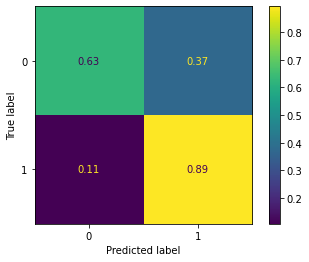

0.6869455943228858

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=37)
dt_clf.fit(X_train, y_train)
preds = dt_clf.predict(X_test)
train_df = pd.merge(X_train, y_train, left_index=True, right_index=True)
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)
test_df['smoking preds'] = preds
ConfusionMatrixDisplay.from_predictions(y_test, preds, normalize='true')
plt.show()
accuracy_score(y_test, preds)

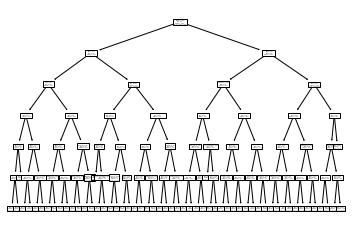

In [ ]:
plot_tree(dt_clf, feature_names = X_test.columns);

#Decision Trees - Train test split, balanced data, correct parameters

In [6]:
#make separate dfs with only smokers and only nonsmokers
df_smokers = df[df['smoking'] == 1]
df_nonsmokers = df[df['smoking'] == 0]
X_smokers = df_smokers.drop(['smoking', 'ID'], axis=1)
y_smokers = df_smokers['smoking']
X_nonsmokers = df_nonsmokers.drop(['smoking', 'ID'], axis=1)
y_nonsmokers = df_nonsmokers['smoking']

In [7]:
#split these dfs 70/30, then combine to get 50-50 balanced training and testing sets
X_train_smokers, X_test_smokers, y_train_smokers, y_test_smokers = train_test_split(X_smokers, y_smokers, train_size = 0.7)
num_rows_to_use = len(X_train_smokers)

X_train_nonsmokers, X_test_nonsmokers, y_train_nonsmokers, y_test_nonsmokers = train_test_split(X_nonsmokers, 
                                                                                    y_nonsmokers, train_size = num_rows_to_use)
X_train = pd.concat([X_train_smokers, X_train_nonsmokers])
y_train = pd.concat([y_train_smokers, y_train_nonsmokers])
X_test = pd.concat([X_test_smokers, X_test_nonsmokers])
y_test = pd.concat([y_test_smokers, y_test_nonsmokers])

In [ ]:
dtc = DecisionTreeClassifier()
dtc_parms = {'max_depth': [2, 5, 10, 25, 50],
             'min_samples_split': [2, 5, 10, 25, 50],
             'min_samples_leaf': [2, 5, 10, 25, 50]}
dtc_grid_search = GridSearchCV(dtc, dtc_parms)
dtc_grid_search.fit(X_train, y_train)
dtc_grid_search.best_params_
dtc_grid_search.best_score_

In [ ]:
dtc_grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 10}

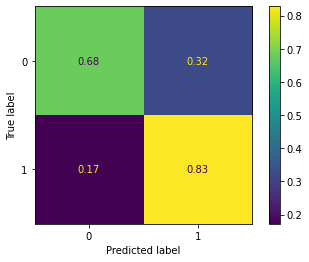

0.7122264931992903

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=50, min_samples_leaf=10)
dt_clf.fit(X_train, y_train)
preds = dt_clf.predict(X_test)
train_df = pd.merge(X_train, y_train, left_index=True, right_index=True)
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)
test_df['smoking preds'] = preds
ConfusionMatrixDisplay.from_predictions(y_test, preds, normalize='true')
plt.show()
accuracy_score(y_test, preds)

Finetuning this decision tree model

In [6]:
#finetuning
dtc = DecisionTreeClassifier()
dtc_parms = {'max_depth': [5, 10, 15, 20, 25],
             'min_samples_split': [5, 10, 15, 20, 25],
             'min_samples_leaf': [40, 45, 50, 55, 60]}
dtc_grid_search = GridSearchCV(dtc, dtc_parms)
dtc_grid_search.fit(X_train, y_train)
print(dtc_grid_search.best_params_)
print(dtc_grid_search.best_score_)

{'max_depth': 10, 'min_samples_leaf': 60, 'min_samples_split': 5}
0.7591841924413709


#Gradient Boosting - run previous section to get properly split and balanced data

0.7696259609698404


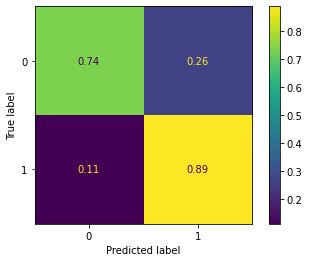

In [7]:
#starting with one learning rate
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 200, learning_rate= .05, max_depth = 10)
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)
print(accuracy_score(y_test, gbc_preds))
ConfusionMatrixDisplay.from_predictions(y_test, gbc_preds, normalize='true')
plt.show()

0.05
0.7689976345357776


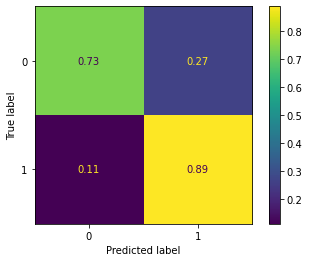

0.075
0.7744677705499704


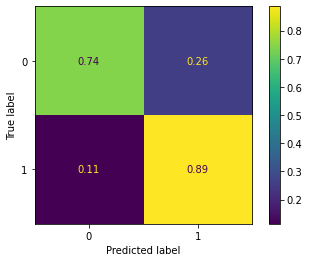

0.1
0.7731741573033708


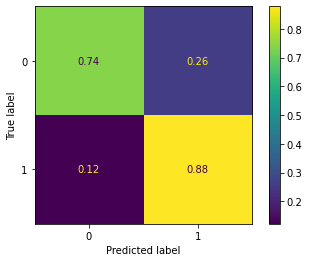

0.15
0.7743199290360734


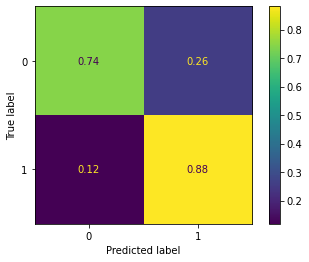

0.2
0.7742090479006505


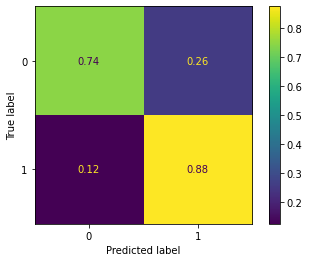

In [13]:
#finetuning learning rate with for loop
from sklearn.ensemble import GradientBoostingClassifier
learning_rate_list = [.05, .075, .1, .15, .2]
for rate in learning_rate_list:
  gbc_loop = GradientBoostingClassifier(n_estimators = 200, learning_rate= rate, max_depth = 10)
  gbc_loop.fit(X_train, y_train)
  gbc_loop_preds = gbc_loop.predict(X_test)
  print(rate)
  print(accuracy_score(y_test, gbc_loop_preds))
  ConfusionMatrixDisplay.from_predictions(y_test, gbc_loop_preds, normalize='true')
  plt.show()
  #.075 is the best learning rate

#Feature importance with permutations

In [14]:
#runs better with one decision tree than with gradient boost?
#be sure to run last decision tree section
from sklearn.inspection import permutation_importance
perm_imp_results = permutation_importance(dtc_grid_search, X_test, y_test, scoring=['accuracy', 'roc_auc'], n_repeats = 4)

In [20]:
len(perm_imp_results['accuracy']['importances_mean'])
len(X_test.columns)

28

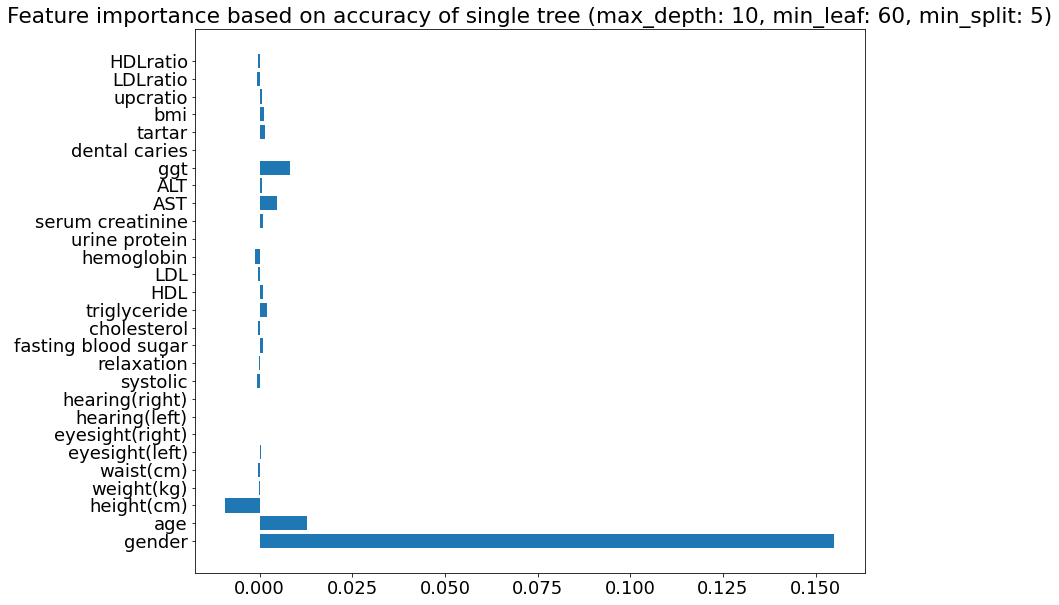

In [38]:
plt.figure(figsize=[12, 10])
plt.barh(y=X_test.columns, width=perm_imp_results['accuracy']['importances_mean'])
plt.title('Feature importance based on accuracy of single tree (max_depth: 10, min_leaf: 60, min_split: 5)')
plt.rc('axes', labelsize=20) 
#plt.close()

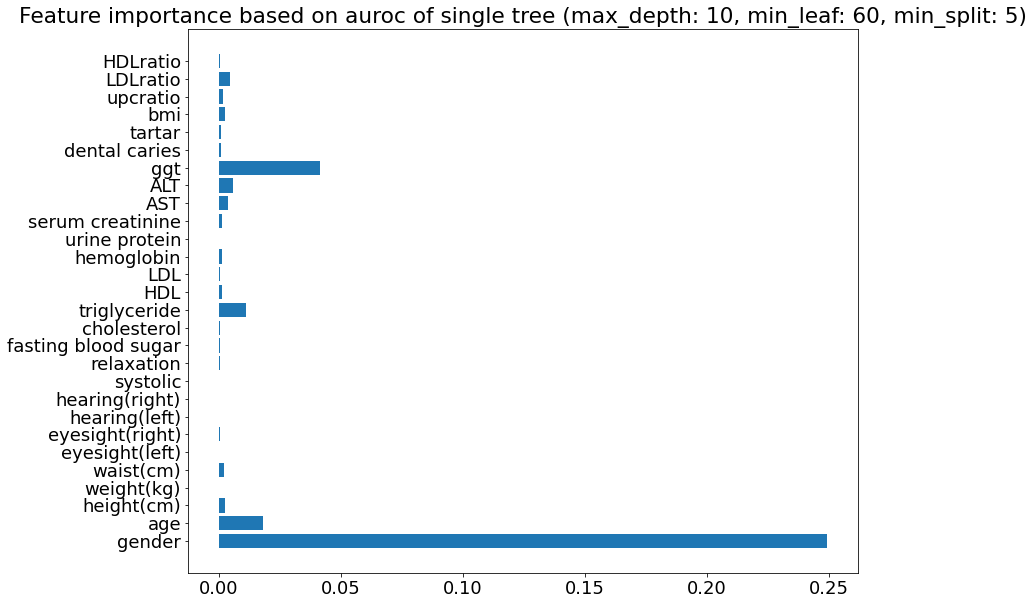

In [39]:
plt.figure(figsize=[12, 10])
plt.barh(y=X_test.columns, width=perm_imp_results['roc_auc']['importances_mean'])
plt.title('Feature importance based on auroc of single tree (max_depth: 10, min_leaf: 60, min_split: 5)')
plt.rc('axes', labelsize=20) 
#auroc tries to get true positives and less false positives

# Misc

In [ ]:
df['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

In [ ]:
df['dental caries'].value_counts()

0    43811
1    11881
Name: dental caries, dtype: int64

In [ ]:
df['age'].min()

20

In [ ]:
df['age'].max()

85